# Finite difference approximation to noisy $\text{sin}(x)$

<img src="/img_sine_cosine.jpg" width=300 height=200/>

## Information

This notebook builds upon the previous case (finitediff_sin). Here, we investigate the sensitivity of the finite difference approximation to derivatives when there is some noise in the function observations. We are still analyzing the simple function $\text{sin}(x)$, with its known analytic derivative $\frac{d\text{sin}(x)}{dx}=\text{cos}(x)$. We show results for the Forward, Backward, and Centered difference schemes. 

Use this notebook to think about the following questions:
- How can we explain the sensitivity of numerical derivatives to observational noise?
- What is the impact of grid resolution on accuracy?

We need to load some libraries.

In [1]:
import os
import sys
import math
import time
import numpy as np
import matplotlib.pyplot as plt

First, let's set up the $x$ domain. Note that it is more convenient to define the grid in radian units.

In [2]:
### Set-up space grid ###
xmin   = 0
xmax   = 2*np.pi
deltax = 0.2 #default: 0.2
gridx  = np.arange(xmin,xmax,step=deltax)
numx   = len(gridx)

Now, decide the level of noise. This is parameterized by the standard deviation (sigma) of Gaussian noise. Remember that $\text{sin}(x)$ scales between -1 and 1.

In [3]:
### Parameters ###
sigma  = 0.002 #default small noise level: 0.002

Next, we define our function, and its analytic derivative.

In [4]:
def sinefunc(rad):
    '''
    Sine function applying to values in radian units
    '''
    return(np.sin(rad))
def cosinefunc(rad):
    '''
    Cosine function applying to values in radian units
    '''
    return(np.cos(rad))

Before approximating the derivative, we need to compute $\text{sin}(x)$ and its noisy version.

In [5]:
uux_nonoise = sinefunc(gridx)
uux         = uux_nonoise+np.random.normal(0,sigma,numx)

Evaluate the true derivative:

In [6]:
true_dudx = cosinefunc(gridx)

Evaluate the approximate derivatives. Note that the Forward scheme requires a special treatment for the right boundary condition, the Backward scheme for the left boundary, and the Centered scheme for both boundaries.

In [7]:
### Forward-difference ###
fd_dudx = np.zeros(numx)
for ii in range(numx-1):
    fd_dudx[ii] = (uux[ii+1]-uux[ii])/deltax
# BC #
fd_dudx[-1] = (uux[-1]-uux[-2])/deltax

### Backward-difference ###
bd_dudx = np.zeros(numx)
for ii in range(1,numx):
    bd_dudx[ii] = (uux[ii]-uux[ii-1])/deltax
# BC #
bd_dudx[0] = (uux[1]-uux[0])/deltax

### Centered-difference ###
cd_dudx = np.zeros(numx)
for ii in range(1,numx-1):
    cd_dudx[ii] = (uux[ii+1]-uux[ii-1])/(2*deltax)
# BC #
cd_dudx[-1] = (uux[-1]-uux[-2])/deltax
cd_dudx[0]  = (uux[1]-uux[0])/deltax

Check the errors of the schemes.

In [8]:
### Errors ###
resids_fd = np.round(fd_dudx-true_dudx,3)
resids_bd = np.round(bd_dudx-true_dudx,3)
resids_cd = np.round(cd_dudx-true_dudx,3)
print(f'FD maximum error: {resids_fd[np.argmax(abs(resids_fd))]} m')
print(f'BD maximum error: {resids_bd[np.argmax(abs(resids_bd))]} m')
print(f'CD maximum error: {resids_cd[np.argmax(abs(resids_cd))]} m')

FD maximum error: 0.125 m
BD maximum error: 0.124 m
CD maximum error: -0.02 m


And make a figure:

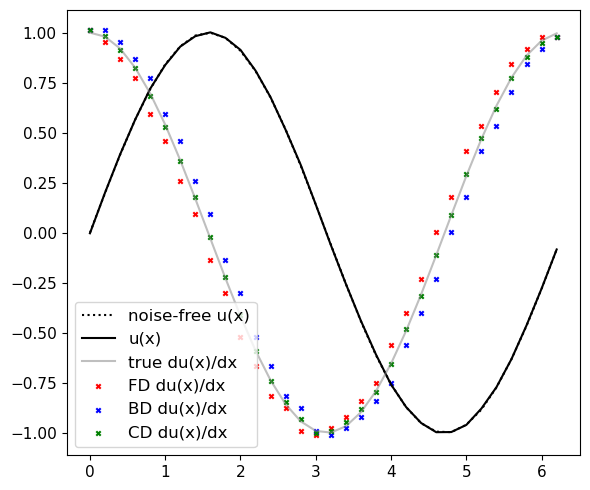

In [9]:
fig = plt.figure(figsize=(6,5))
ax = plt.subplot(111)
ax.plot(gridx,uux_nonoise,c='k',linestyle=':',label='noise-free u(x)')
ax.plot(gridx,uux,c='k',label='u(x)')
ax.plot(gridx,true_dudx,c='grey',label='true du(x)/dx',alpha=0.5)
ax.scatter(gridx,fd_dudx,c='r',marker='x',s=10,label='FD du(x)/dx')
ax.scatter(gridx,bd_dudx,c='b',marker='x',s=10,label='BD du(x)/dx')
ax.scatter(gridx,cd_dudx,c='g',marker='x',s=10,label='CD du(x)/dx')
ax.legend(loc='best',fontsize=12)
ax.tick_params(which='major',axis='both',labelsize=11)
fig.tight_layout()